## Final Project Submission

Please fill out:
* Student name: Travis Royce
* Student pace: self paced, but currently working on it full-time.
* Scheduled project review date/time: NA
* Instructor name: 
* Blog post URL: https://medium.com/@traviscroyce/seaborn-coloring-for-continuous-variables-41f82b13d143


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [53]:
house_df = pd.read_csv('data\kc_house_data.csv')

In [54]:
#Prediction target is the price of the home
target = house_df['price']
X = house_df.drop('price', axis = 1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42)

## Preprocessing

## Data Visualization

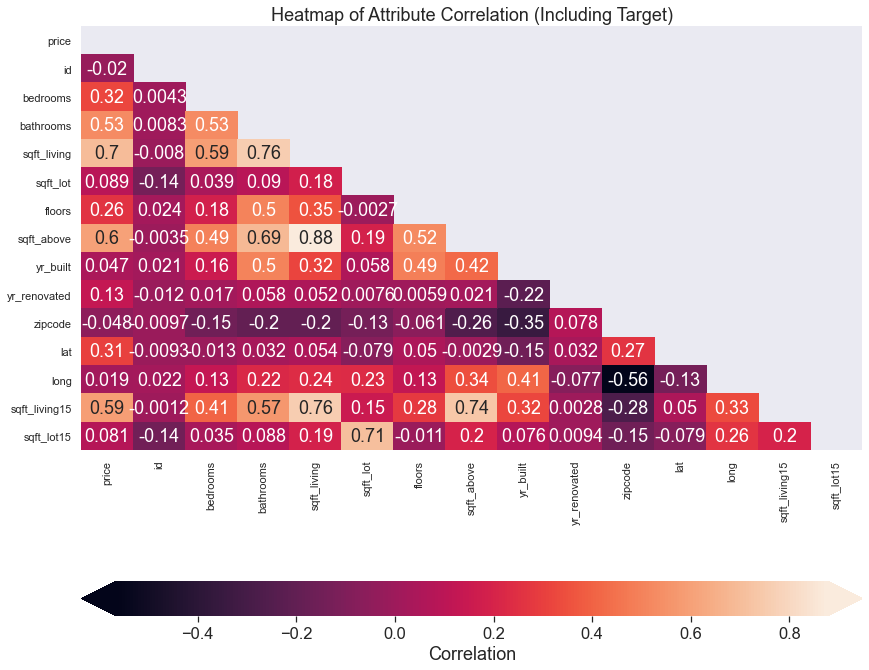

In [56]:
# Create a df with the target as the first column,
# then compute the correlation matrix
for_viz = pd.concat([y_train, X_train], axis=1)
corr = for_viz.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(14, 12))
sns.set(font_scale = 1.5)

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Attribute Correlation (Including Target)");

According to this correlation heatmap, the variable most correlated to price is the square feet of livable area. 

In [57]:
highest_cor = 'sqft_living'

(0.0, 3000000.0)

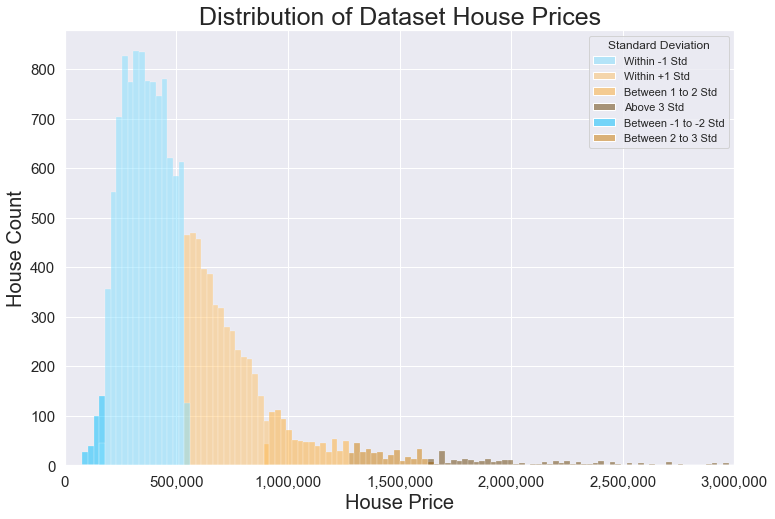

In [58]:

df = for_viz
chosen_column = 'price'

#Calculate mean and standard deviation
mn = df[chosen_column].mean()
std = df[chosen_column].std()

# Create Standard Deviation Bands
std_m1 = mn - std
std_m2 = mn - (2*std)
std_m3 = mn - (3*std)
std_p1 = mn + std
std_p2 = mn + (2*std)
std_p3 = mn + (3*std)


# Conditions
conditions = [ 
    (df[chosen_column] > std_p3),
    (df[chosen_column] > std_p2) & (df[chosen_column] < std_p3),
    (df[chosen_column] > std_p1) & (df[chosen_column] < std_p2),
    (df[chosen_column] > mn) & (df[chosen_column] < std_p1),
    (df[chosen_column] > std_m1) & (df[chosen_column] < mn),
    (df[chosen_column] > std_m2) & (df[chosen_column] < std_m1),
    (df[chosen_column] > std_m3) & (df[chosen_column] < std_m2),
    (df[chosen_column] < std_m3)
]

# List of values
values = ['Above 3 Std', 'Between 2 to 3 Std', 'Between 1 to 2 Std', 
        'Within +1 Std', 'Within -1 Std', 'Between -1 to -2 Std', 
        'Between -2 to -3 Std', 'Below -3 Std']

#new column to assign variables
df['Standard Deviation'] = np.select(conditions, values)

# color palette
# You can use https://www.w3schools.com/colors/colors_picker.asp

color_dict = {'Above 3 Std': '#663d00', 'Between 2 to 3 Std' : '#cc7a00', 
            'Between 1 to 2 Std': '#ffad33',
            'Within +1 Std' :'#ffc266', 'Within -1 Std': '#80dfff', 
            'Between -1 to -2 Std' : '#00bfff', 
            'Between -2 to -3 Std' : '#006080', 'Below -3 Std' : '#002633' }



#------------------------------------------------------#
# Plot the Distribution
sns.set_theme(style = 'darkgrid')
f, ax = plt.subplots(figsize=(12,8))


# Create histogram
sns.histplot(data = for_viz, x="price", 
            hue = 'Standard Deviation', palette = color_dict)

# Format
plt.xlabel( "House Price", fontsize = 20)
plt.ylabel("House Count", fontsize=20)
plt.title("Distribution of Dataset House Prices", size = 25)
ax.tick_params(labelsize = 15)

#Change from scientific to plain labels
plt.ticklabel_format(style='plain', axis='x') 

#Add commas for thousands
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

#Set plot x-axis area
plt.xlim(left = 0, right = 3000000)

(0.0, 3000000.0)

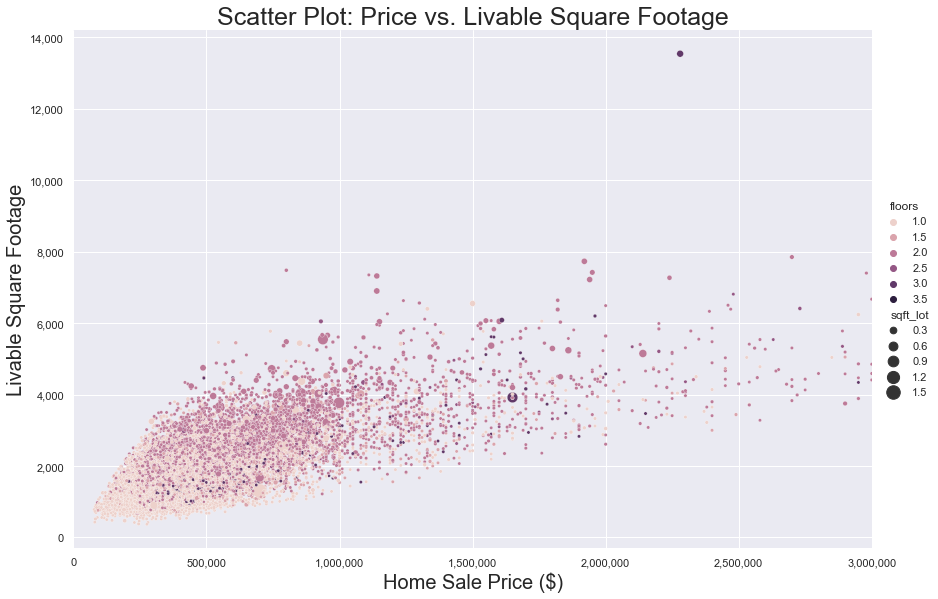

In [59]:
sns.set_theme(style="darkgrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=for_viz,
    x="price", y=highest_cor,
    hue="floors", size="sqft_lot", sizes=(10, 200),
    height=8, aspect=1.5,
)
g.set(xscale="linear", yscale="linear")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

#Label
plt.xlabel( "Home Sale Price ($)", fontsize = 20)
plt.ylabel("Livable Square Footage", fontsize=20)
plt.title("Scatter Plot: Price vs. Livable Square Footage", fontsize = 25)


#Change from scientific to plain labels
plt.ticklabel_format(style='plain', axis='x') 

#Add commas for thousands
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim(left = 0, right = 3000000)


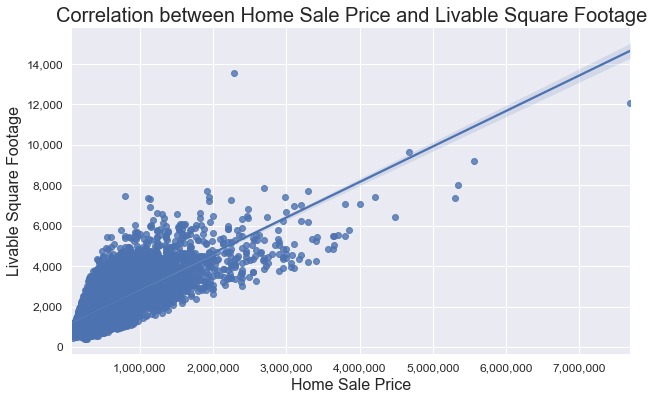

In [60]:
# Correlation between Home Sale Price and Livable Square Footage

sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f, left=True, bottom=True)

sns.regplot(x="price", y=highest_cor,
                data=for_viz, ax=ax)

plt.title("Correlation between Home Sale Price and Livable Square Footage", size = 20)
plt.xlabel("Home Sale Price", size = 16)
plt.ylabel("Livable Square Footage", size = 16)
ax.tick_params(labelsize = 12)

#Change from scientific to plain labels
plt.ticklabel_format(style='plain', axis='x') 

#Add commas for thousands
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## Baseline Model

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit


baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[highest_cor]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4895269677689762
Validation score: 0.4935530672243642


We got a validation score slightly above .5, which is not bad to start.

## 2. Numerical Model

In [62]:
X_train_num = X_train.copy()

X_train_num.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,8 Good,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,7 Average,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
19076,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,9 Better,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,7 Average,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,8 Good,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606


## Preprocessing Training Data

This look at the data lets us take a look at the possible features. There are some features that stand out to me as being specifically not helpful: 
    - id (it is a unique identifier, not a numeric feature)
    - lattitude
    - longitude
    - zipcode

While the location data may be helpful, I want to look at it in a simpler way, by city.
To do this, I need to add a city feature that uses zipcodes to correspond to the city. 

### Change Zip Codes to Cities

In [63]:
#list zips and make dataframe of them
all_zips = X_train.zipcode.unique().tolist()
zips_df = pd.DataFrame(all_zips)
zips_df['Zipcode'] = zips_df[0]
zips_df.drop(columns = 0)

,Zipcode
0,98029
1,98042
2,98027
3,98117
4,98055
...,...
65,98188
66,98007
67,98178
68,98148


In [64]:
#Load zipcodes-to-cities data
zip_cities = pd.read_csv('data/washington_zipcodes.csv')
zip_cities.head()

,Zipcode,Type,City,County,State
0,98001,Standard,Auburn,King County,WA
1,98002,Standard,Auburn,King County,WA
2,98003,Standard,Federal Way,King County,WA
3,98004,Standard,Bellevue,King County,WA
4,98005,Standard,Bellevue,King County,WA


In [65]:
# Join the zip_cities dataframe with the all_zips dataframe to identify cities using inner join

zip_to_city= pd.merge(zips_df, zip_cities, how = 'inner', on = 'Zipcode')
zip_to_city = zip_to_city.drop(columns = [0, 'Type', 'County', 'State'])
zip_to_city.rename(columns={'Zipcode' : 'zipcode'}, inplace= True )

zip_to_city.head()


,zipcode,City
0,98029,Issaquah
1,98042,Kent
2,98027,Issaquah
3,98117,Seattle
4,98055,Renton


In [66]:
# Add city to the housing data. 
X_train_num = pd.merge(X_train_num, zip_to_city, how = 'left', on = "zipcode")
X_train_num

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,...,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,Issaquah
1,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,...,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,Kent
2,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,...,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,Issaquah
3,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,...,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880,Seattle
4,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,...,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606,Kent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,7853230570,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,Average,...,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088,Snoqualmie
16193,4140940150,10/2/2014,4,2.75,2770,3852,2.0,NO,NONE,Average,...,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641,Seattle
16194,8658300480,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,Good,...,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500,Carnation
16195,1723049033,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,Average,...,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000,Seattle


In [67]:
#create another vizualization dataframe
viz_2 = pd.concat([y_train, X_train_num], axis=1)

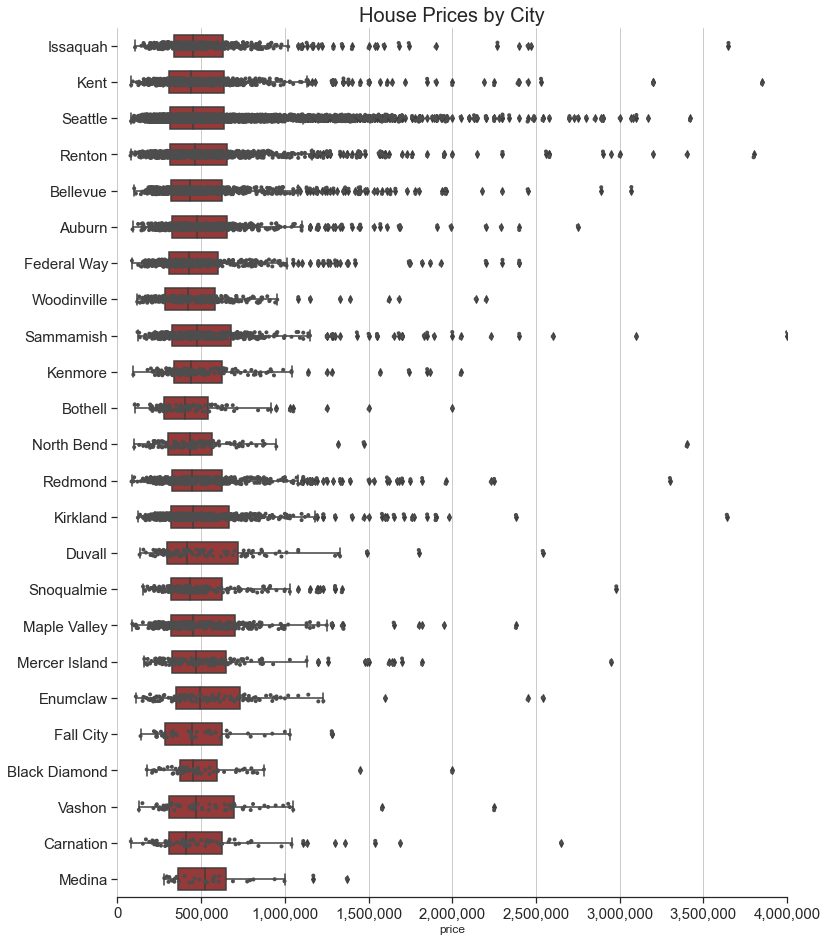

In [68]:
# Distribution of Prices by City
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(12, 16))
sns.set(font_scale = 1.5)

# Plot with horizontal boxes
sns.boxplot(x="price", y="City", data=viz_2,width=.6, color = 'brown')

# Add observations
sns.stripplot(x="price", y="City", data=viz_2,size=4, color=".3", linewidth=0)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

# Format
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlim=(0, 4000000))

plt.title('House Prices by City', fontsize = 20)
sns.despine(trim=True, left=True)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))



In [101]:
#Median home price by city
group_df = viz_2.groupby('City')['price'].agg(['median', 'count', 'mean','std']).reset_index()
group_df

,City,median,count,mean,std
0,Auburn,475000.0,515,545480.636893,330253.666986
1,Bellevue,436000.0,763,529397.771953,338059.947641
2,Black Diamond,454000.0,62,514192.580645,287301.719657
3,Bothell,405000.0,105,461746.523810,274902.591321
4,Carnation,412250.0,77,541615.584416,401812.440556
5,Duvall,415000.0,111,541473.540541,363492.463890
6,Enumclaw,493725.0,124,568436.516129,365900.180427
7,Fall City,445000.0,48,504416.187500,272967.562840
8,Federal Way,430000.0,435,517615.057471,333063.526941
9,Issaquah,449975.0,432,534724.180556,355535.211028


No handles with labels found to put in legend.


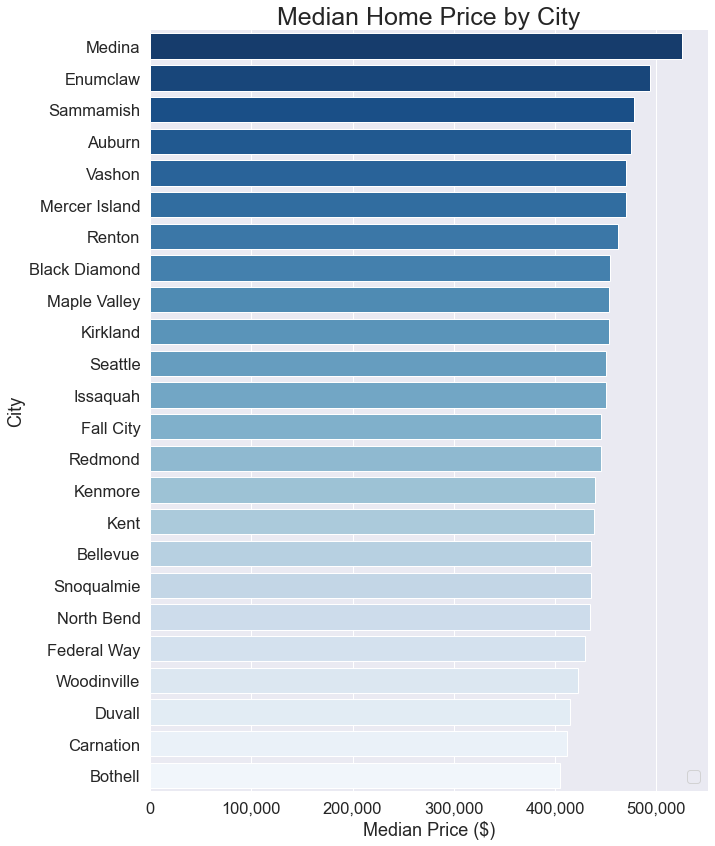

In [111]:
group_df = group_df.sort_values('median', ascending= False)


sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 14))


#plot
sns.barplot(x="median", y="City", data=group_df,
             palette = 'Blues_r')


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="City", xlabel="Median Price ($)")
sns.despine(left=True, bottom=True)
plt.title("Median Home Price by City", size = 25)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


In [69]:
#Get list of cities
cities = X_train_num.City.unique().tolist()

In [70]:
#Lets add the cities in as dummy variables. 
X_train_num['Seattle'] = np.where(X_train_num['City'] == 'Seattle', 1, 0)
X_train_num['Kenmore'] = np.where(X_train_num['City'] == 'Kenmore', 1, 0)
X_train_num['Sammamish'] = np.where(X_train_num['City'] == 'Sammamish', 1, 0)
X_train_num['Redmond'] = np.where(X_train_num['City'] == 'Redmond', 1, 0)
X_train_num['Federal Way'] = np.where(X_train_num['City'] == 'Federal Way', 1, 0)
X_train_num['Maple Valley'] = np.where(X_train_num['City'] == 'Maple Valley', 1, 0)
X_train_num['Bellevue'] = np.where(X_train_num['City'] == 'Bellevue', 1, 0)
X_train_num['Duvall'] = np.where(X_train_num['City'] == 'Duvall', 1, 0)
X_train_num['Auburn'] = np.where(X_train_num['City'] == 'Auburn', 1, 0)
X_train_num['Mercer Island'] = np.where(X_train_num['City'] == 'Mercer Island', 1, 0)
X_train_num['Kent'] = np.where(X_train_num['City'] == 'Kent', 1, 0)
X_train_num['Issaquah'] = np.where(X_train_num['City'] == 'Issaquah', 1, 0)
X_train_num['Renton'] = np.where(X_train_num['City'] == 'Renton', 1, 0)
X_train_num['Vashon'] = np.where(X_train_num['City'] == 'Vashon', 1, 0)
X_train_num['Kirkland'] = np.where(X_train_num['City'] == 'Kirkland', 1, 0)
X_train_num['Black Diamond'] = np.where(X_train_num['City'] == 'Black Diamond', 1, 0)
X_train_num['North Bend'] = np.where(X_train_num['City'] == 'North Bend', 1, 0)
X_train_num['Woodinville'] = np.where(X_train_num['City'] == 'Woodinville', 1, 0)
X_train_num['Snoqualmie'] = np.where(X_train_num['City'] == 'Snoqualmie', 1, 0)
X_train_num['Enumclaw'] = np.where(X_train_num['City'] == 'Enumclaw', 1, 0)
X_train_num['Fall City'] = np.where(X_train_num['City'] == 'Fall City', 1, 0)
X_train_num['Bothell'] = np.where(X_train_num['City'] == 'Bothell', 1, 0)
X_train_num['Carnation'] = np.where(X_train_num['City'] == 'Carnation', 1, 0)
X_train_num['Medina'] = np.where(X_train_num['City'] == 'Medina', 1, 0)

X_train_num.head()



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Kirkland,Black Diamond,North Bend,Woodinville,Snoqualmie,Enumclaw,Fall City,Bothell,Carnation,Medina
0,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,...,0,0,0,0,0,0,0,0,0,0
1,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,...,0,0,0,0,0,0,0,0,0,0
2,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,...,0,0,0,0,0,0,0,0,0,0
3,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,...,0,0,0,0,0,0,0,0,0,0
4,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,...,0,0,0,0,0,0,0,0,0,0


From this chart, we can see that different cities have pretty distinct distributions, which may help us with achieving our goal. The cities of Medina, Mercer Island, and Bellevue are are especially different from the rest of the distributions. 

In [71]:
# Drop irrelevant columns
X_train_num = X_train_num.drop(columns = ['lat', 'long', 'City', 'id', 'zipcode'])
X_train_num.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Kirkland,Black Diamond,North Bend,Woodinville,Snoqualmie,Enumclaw,Fall City,Bothell,Carnation,Medina
0,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,0,0
1,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,7 Average,...,0,0,0,0,0,0,0,0,0,0
2,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,9 Better,...,0,0,0,0,0,0,0,0,0,0
3,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,7 Average,...,0,0,0,0,0,0,0,0,0,0
4,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,8 Good,...,0,0,0,0,0,0,0,0,0,0


### Identify Missing Values

In [72]:
#Identify columns with missing values
missing = X_train_num.isna().sum()
missing_df = pd.DataFrame(missing)
missing_df = missing_df.loc[missing_df[0] > 0]
missing_df



,0
waterfront,1756
view,49
yr_renovated,2879


### Fix Missing Values

In [73]:
# Deal with waterfront missing values by turning them to "No"
X_train_num.waterfront = X_train_num.waterfront.fillna('NO')

# Now deal with missing "view"
X_train_num.view = X_train_num.view.fillna('NONE')

# Deal with year rennovated NANs... drop the column? too many?
X_train_num= X_train_num.drop(columns = ['yr_renovated'])



### Turn all Values to Numeric

In [74]:
# The "grade" column has too much info, we just need the number grade.
X_train_num['grade'] = X_train_num['grade'].str[0:1]
X_train_num.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Kirkland,Black Diamond,North Bend,Woodinville,Snoqualmie,Enumclaw,Fall City,Bothell,Carnation,Medina
0,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,8,...,0,0,0,0,0,0,0,0,0,0
1,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,7,...,0,0,0,0,0,0,0,0,0,0
2,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,9,...,0,0,0,0,0,0,0,0,0,0
3,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,7,...,0,0,0,0,0,0,0,0,0,0
4,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,8,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Now, we must fix the "condition" into a grading system
X_train_num.condition.unique()

array(['Average', 'Very Good', 'Good', 'Fair', 'Poor'], dtype=object)

From the unique function, we can see that there are 5 possible outcomes. Let's change these 5 outcomes to numerical outcomes. 

In [76]:
X_train_num['condition'].replace({'Poor': 1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5},inplace=True)

# Make Waterfront a categorical variable of either 0 or 1
X_train_num['waterfront'] = np.where(X_train_num['waterfront'] == 'YES', 1, 0)
X_train_num.head()


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Kirkland,Black Diamond,North Bend,Woodinville,Snoqualmie,Enumclaw,Fall City,Bothell,Carnation,Medina
0,3/4/2015,3,2.50,1880,4499,2.0,0,NONE,3,8,...,0,0,0,0,0,0,0,0,0,0
1,10/7/2014,3,2.50,2020,6564,1.0,0,NONE,3,7,...,0,0,0,0,0,0,0,0,0,0
2,1/16/2015,5,4.00,4720,493534,2.0,0,NONE,5,9,...,0,0,0,0,0,0,0,0,0,0
3,3/30/2015,2,2.00,1430,3880,1.0,0,NONE,4,7,...,0,0,0,0,0,0,0,0,0,0
4,10/14/2014,3,2.25,2270,32112,1.0,0,NONE,4,8,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Now, we must fix the "view" into a grading system
X_train_num.view.unique()

array(['NONE', 'GOOD', 'AVERAGE', 'EXCELLENT', 'FAIR'], dtype=object)

In [78]:
#Adding numerical values
X_train_num['view'].replace({'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4},inplace=True)
X_train_num.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Kirkland,Black Diamond,North Bend,Woodinville,Snoqualmie,Enumclaw,Fall City,Bothell,Carnation,Medina
0,3/4/2015,3,2.50,1880,4499,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,10/7/2014,3,2.50,2020,6564,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,1/16/2015,5,4.00,4720,493534,2.0,0,0,5,9,...,0,0,0,0,0,0,0,0,0,0
3,3/30/2015,2,2.00,1430,3880,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,10/14/2014,3,2.25,2270,32112,1.0,0,0,4,8,...,0,0,0,0,0,0,0,0,0,0


In [79]:

# Get rid of date, column
X_train_num = X_train_num.drop(columns= ['date'])

# Changing objects to int or float
X_train_num['grade'] = X_train_num['grade'].astype(float)

# Replace ? values with 0 in sqft_basement
X_train_num['sqft_basement'].replace({'?': 0},inplace=True)
X_train_num['sqft_basement'] = X_train_num['sqft_basement'].astype(float)

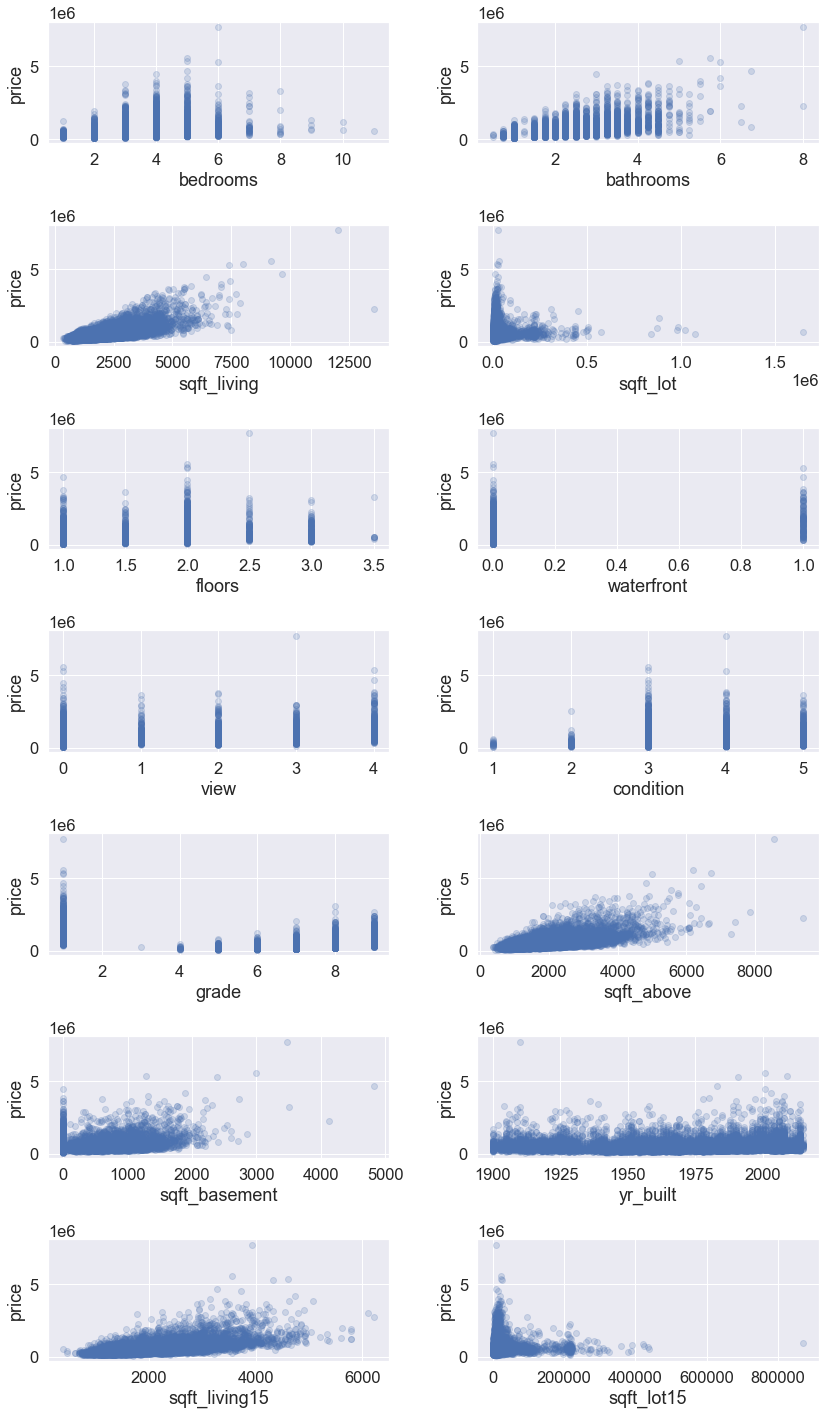

In [80]:
scatterplot_data = X_train_num.drop(cities, axis=1)

fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//2][index%2]
    ax.scatter(X_train_num[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

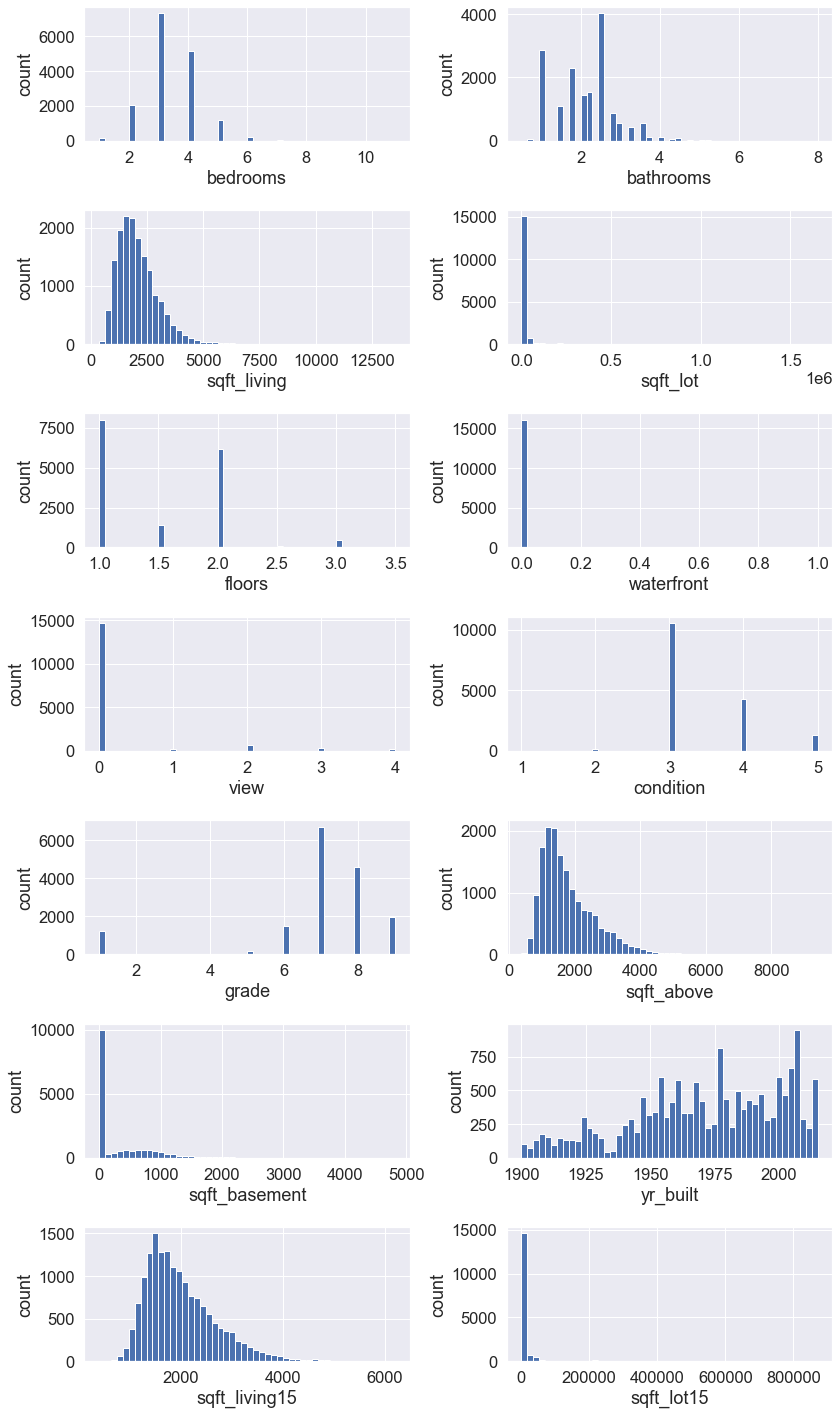

In [81]:
# Checking Variable Distributions for Normality

fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//2][index%2]
    ax.hist(X_train_num[col], bins = 50)
    ax.set_xlabel(col)
    ax.set_ylabel('count')


## Ready the Second Model

In [82]:
model_2 = X_train_num
model_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,Kirkland,Black Diamond,North Bend,Woodinville,Snoqualmie,Enumclaw,Fall City,Bothell,Carnation,Medina
0,3,2.50,1880,4499,2.0,0,0,3,8.0,1880,...,0,0,0,0,0,0,0,0,0,0
1,3,2.50,2020,6564,1.0,0,0,3,7.0,1310,...,0,0,0,0,0,0,0,0,0,0
2,5,4.00,4720,493534,2.0,0,0,5,9.0,3960,...,0,0,0,0,0,0,0,0,0,0
3,2,2.00,1430,3880,1.0,0,0,4,7.0,1430,...,0,0,0,0,0,0,0,0,0,0
4,3,2.25,2270,32112,1.0,0,0,4,8.0,1740,...,0,0,0,0,0,0,0,0,0,0


In [83]:

second_model_scores = cross_validate(
    estimator=LinearRegression(),
    X=model_2,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7286710302500642
Validation score: 0.7093151249832275

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


## Select Best Features
### Investigate Multicollinearity

In [84]:
import statsmodels.api as sm

y_train = list(y_train) #read that this would fix a problem online

sm.OLS(y_train, sm.add_constant(model_2)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1147.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:30:24   Log-Likelihood:            -2.2005e+05
No. Observations:               16197   AIC:                         4.402e+05
Df Residuals:                   16159   BIC:                         4.405e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.084e+06   1.47e+05     20.963      0.000     2.8e+06    3.37e+06
bedrooms      -4.095e+04   2193.122    -18.670      0.000   -4.52e+04   -3.66e+04
bathrooms      5.481e+04   3597.240     15.237      0.000    4.78e+04    6.19e+04
sqft_living     132.0419     21.067      6.268      0.000      90.748     173.336
sqft_lot          0.1444      0.053      2.707      0.007       0.040       0.249
floors         4.899e+04   4098.149     11.955      0.000     4.1e+04     5.7e+04
waterfront     5.811e+05   2.01e+04     28.949      0.000    5.42e+05     6.2e+05
view            5.02e+04   2357.650     21.294      0.000    4.56e+04    5.48e+04
condition      2.748e+04   2593.736     10.595      0.000    2.24e+04    3.26e+04
grade         -1.987e+04    861.860    -23.054      0.000   -2.16e+04   -1.82e+04
sqft_above       72.7080     21.063      3.452      0.001      31.421     113.995
sqft_basement    39.3034     20.865      1.884      0.060      -1.595      80.202
yr_built      -1640.2976     77.418    -21.187      0.000   -1792.046   -1488.549
sqft_living15    63.7283      3.806     16.745      0.000      56.268      71.188
sqft_lot15       -0.4128      0.084     -4.926      0.000      -0.577      -0.249
Seattle        1.783e+05   6065.414     29.404      0.000    1.66e+05     1.9e+05
Kenmore        6.633e+04   1.43e+04      4.626      0.000    3.82e+04    9.44e+04
Sammamish      1.138e+05   1.04e+04     10.916      0.000    9.34e+04    1.34e+05
Redmond        1.703e+05   9875.492     17.247      0.000    1.51e+05     1.9e+05
Federal Way   -5.776e+04   1.03e+04     -5.598      0.000    -7.8e+04   -3.75e+04
Maple Valley  -2.988e+04   1.15e+04     -2.595      0.009   -5.25e+04   -7306.846
Bellevue       3.192e+05   8913.984     35.812      0.000    3.02e+05    3.37e+05
Duvall         2.464e+04   1.72e+04      1.430      0.153   -9132.729    5.84e+04
Auburn        -5.543e+04   1.01e+04     -5.506      0.000   -7.52e+04   -3.57e+04
Mercer Island   4.52e+05   1.44e+04     31.285      0.000    4.24e+05     4.8e+05
Kent          -4.044e+04   9524.366     -4.246      0.000   -5.91e+04   -2.18e+04
Issaquah       1.277e+05   1.05e+04     12.181      0.000    1.07e+05    1.48e+05
Renton         1.094e+04   8772.548      1.247      0.212   -6256.270    2.81e+04
Vashon        -1.016e+04   2.16e+04     -0.469      0.639   -5.26e+04    3.23e+04
Kirkland        2.22e+05   9645.362     23.012      0.000    2.03e+05    2.41e+05
Black Diamond  1.219e+04   2.18e+04      0.560      0.575   -3.05e+04    5.48e+04
North Bend     5.833e+04   1.56e+04      3.731      0.000    2.77e+04     8.9e+04
Woodinville     8.42e+04    1.2e+04      7.040      0.000    6.08e+04    1.08e+05
Snoqualmie    -9961.7867   1.43e+04     -0.697      0.486    -3.8e+04     1.8e+04
Enumclaw      -3.734e+04    1.6e+04     -2.328   

## Third Model - Significant Features

In [85]:
significant_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                            'waterfront', 'view', 'condition', 'grade','sqft_above', 
                            'yr_built', 'sqft_living15', 'sqft_lot15', 'Seattle',
                            'Kenmore', 'Sammamish', 'Redmond','Federal Way', 'Maple Valley',
                            'Bellevue', 'Auburn', 'Mercer Island', 'Kent', 'Issaquah',
                            'Kirkland', 'North Bend', 'Woodinville', 'Enumclaw', 'Fall City',
                            'Bothell', 'Carnation', 'Medina']

In [86]:
third_model = LinearRegression()
X_train_third_model = model_2[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7285342745325276
Validation score: 0.7093025435048336

Second Model
Train score:      0.7286710302500642
Validation score: 0.7093151249832275

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


## Preprocess Test Data

### Drop Irrelevant Columns / Handle Missing Values / Convert Categorical Features to Numbers

In [87]:
X_test = X_test.drop(columns = ['lat', 'long'])

# Deal with waterfront missing values by turning them to "No"
X_test.waterfront = X_test.waterfront.fillna('NO')

# Now deal with missing "view"
X_test.view = X_test.view.fillna('NONE')

# Deal with year rennovated NANs
X_test.yr_renovated = X_test.yr_renovated.fillna(0)

# The "grade" column has too much info, we just need the number grade.
X_test['grade'] = X_test['grade'].str[0:1]

#Fix condition
X_test['condition'].replace({'Poor': 1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5},inplace=True)

# Make Waterfront a categorical variable of either 0 or 1
X_test['waterfront'] = np.where(X_test['waterfront'] == 'YES', 1, 0)

#Turn view into grading system
X_test['view'].replace({'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4},inplace=True)

# Get rid of date,id and zipcode columns
X_test = X_test.drop(columns= ['id', 'date'])

# Changing objects to int or float
X_test['grade'] = X_test['grade'].astype(float)

# Replace ? values in sqft_basement
X_test['sqft_basement'].replace({'?': 0},inplace=True)
X_test['sqft_basement'] = X_test['sqft_basement'].astype(float)

# Add all cities 
X_test = pd.merge(X_test, zip_to_city, how = 'left', on = "zipcode")

# Add the city columns
X_test['Seattle'] = np.where(X_test['City'] == 'Seattle', 1, 0)
X_test['Kenmore'] = np.where(X_test['City'] == 'Kenmore', 1, 0)
X_test['Sammamish'] = np.where(X_test['City'] == 'Sammamish', 1, 0)
X_test['Redmond'] = np.where(X_test['City'] == 'Redmond', 1, 0)
X_test['Federal Way'] = np.where(X_test['City'] == 'Federal Way', 1, 0)
X_test['Maple Valley'] = np.where(X_test['City'] == 'Maple Valley', 1, 0)
X_test['Bellevue'] = np.where(X_test['City'] == 'Bellevue', 1, 0)
X_test['Duvall'] = np.where(X_test['City'] == 'Duvall', 1, 0)
X_test['Auburn'] = np.where(X_test['City'] == 'Auburn', 1, 0)
X_test['Mercer Island'] = np.where(X_test['City'] == 'Mercer Island', 1, 0)
X_test['Kent'] = np.where(X_test['City'] == 'Kent', 1, 0)
X_test['Issaquah'] = np.where(X_test['City'] == 'Issaquah', 1, 0)
X_test['Renton'] = np.where(X_test['City'] == 'Renton', 1, 0)
X_test['Vashon'] = np.where(X_test['City'] == 'Vashon', 1, 0)
X_test['Kirkland'] = np.where(X_test['City'] == 'Kirkland', 1, 0)
X_test['Black Diamond'] = np.where(X_test['City'] == 'Black Diamond', 1, 0)
X_test['North Bend'] = np.where(X_test['City'] == 'North Bend', 1, 0)
X_test['Woodinville'] = np.where(X_test['City'] == 'Woodinville', 1, 0)
X_test['Snoqualmie'] = np.where(X_test['City'] == 'Snoqualmie', 1, 0)
X_test['Enumclaw'] = np.where(X_test['City'] == 'Enumclaw', 1, 0)
X_test['Fall City'] = np.where(X_test['City'] == 'Fall City', 1, 0)
X_test['Bothell'] = np.where(X_test['City'] == 'Bothell', 1, 0)
X_test['Carnation'] = np.where(X_test['City'] == 'Carnation', 1, 0)
X_test['Medina'] = np.where(X_test['City'] == 'Medina', 1, 0)

## Selecting Features with sklearn

In [88]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler


X_train_for_RFECV = StandardScaler().fit_transform(model_2)
model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(model_2.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: False
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
yr_built: True
sqft_living15: True
sqft_lot15: True
Seattle: True
Kenmore: True
Sammamish: True
Redmond: True
Federal Way: True
Maple Valley: True
Bellevue: True
Duvall: True
Auburn: True
Mercer Island: True
Kent: True
Issaquah: True
Renton: True
Vashon: True
Kirkland: True
Black Diamond: True
North Bend: True
Woodinville: True
Snoqualmie: True
Enumclaw: True
Fall City: True
Bothell: True
Carnation: True
Medina: True


The algorithm chose every feature EXCEPT lot square feet (`sqft_lot`)

## Build Final Model

In [89]:
# Taking the algorithms suggestion of dropping sqft lot
better_model = model_2.drop(columns='sqft_lot')

In [90]:
final_cols = list(better_model.columns)

In [91]:
X_train_final = model_2[final_cols]
X_test_final = X_test[final_cols]

In [92]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.7102066289970157

### Calculate RMSE

In [93]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

199398.01053742899

For the average home, this linear regression algorithm would be off by almost $200,000. 

## Final Model Interpretation

In [94]:
coef = pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients")
co_df = pd.DataFrame(coef)
print("Intercept:", final_model.intercept_)

Intercept: 3226096.222873156


In [95]:

co_df = co_df.apply(lambda x: '%.2f' % x, axis=1)
co_df

bedrooms          -41072.66
bathrooms          54857.67
sqft_living          132.07
floors             48752.87
waterfront        580218.41
view               50394.33
condition          27368.92
grade             -19918.13
sqft_above            73.50
sqft_basement         39.67
yr_built           -1646.42
sqft_living15         63.16
sqft_lot15            -0.27
Seattle            49034.83
Kenmore           -62631.12
Sammamish         -15227.24
Redmond            41560.57
Federal Way      -186901.06
Maple Valley     -158604.79
Bellevue          189931.38
Duvall           -104163.47
Auburn           -184298.94
Mercer Island     322623.69
Kent             -169088.34
Issaquah            -994.21
Renton           -117890.11
Vashon           -136874.84
Kirkland           92810.51
Black Diamond    -116515.69
North Bend        -67940.00
Woodinville       -44138.37
Snoqualmie       -138544.61
Enumclaw         -164126.68
Fall City          -4594.97
Bothell           -61858.87
Carnation         -6

In [112]:
city_list = [ 'Seattle','Kenmore', 'Sammamish', 'Redmond','Federal Way', 'Maple Valley',
             'Bellevue', 'Auburn', 'Mercer Island', 'Kent', 'Issaquah',
            'Kirkland', 'North Bend', 'Woodinville', 'Enumclaw', 'Fall City',
             'Bothell', 'Carnation', 'Medina']

co_df = pd.DataFrame(co_df[city_list])

In [115]:
co_df = co_df.reset_index()

In [118]:
co_df = co_df.sort_values(0, ascending= False)
co_df

,index,0
11,Kirkland,92810.51
0,Seattle,49034.83
3,Redmond,41560.57
8,Mercer Island,322623.69
6,Bellevue,189931.38
18,Medina,1107303.35
10,Issaquah,-994.21
17,Carnation,-68871.02
12,North Bend,-67940.00
1,Kenmore,-62631.12


In [122]:
co_df = co_df.rename(columns={0 : 'Value_added'})
co_df

,index,Value_added
11,Kirkland,92810.51
0,Seattle,49034.83
3,Redmond,41560.57
8,Mercer Island,322623.69
6,Bellevue,189931.38
18,Medina,1107303.35
10,Issaquah,-994.21
17,Carnation,-68871.02
12,North Bend,-67940.00
1,Kenmore,-62631.12


In [124]:
co_df['Value_added'] = pd.to_numeric(co_df['Value_added'])
co_df

,index,Value_added
11,Kirkland,92810.51
0,Seattle,49034.83
3,Redmond,41560.57
8,Mercer Island,322623.69
6,Bellevue,189931.38
18,Medina,1107303.35
10,Issaquah,-994.21
17,Carnation,-68871.02
12,North Bend,-67940.00
1,Kenmore,-62631.12


In [126]:
co_df = co_df.sort_values('Value_added', ascending= False)

No handles with labels found to put in legend.


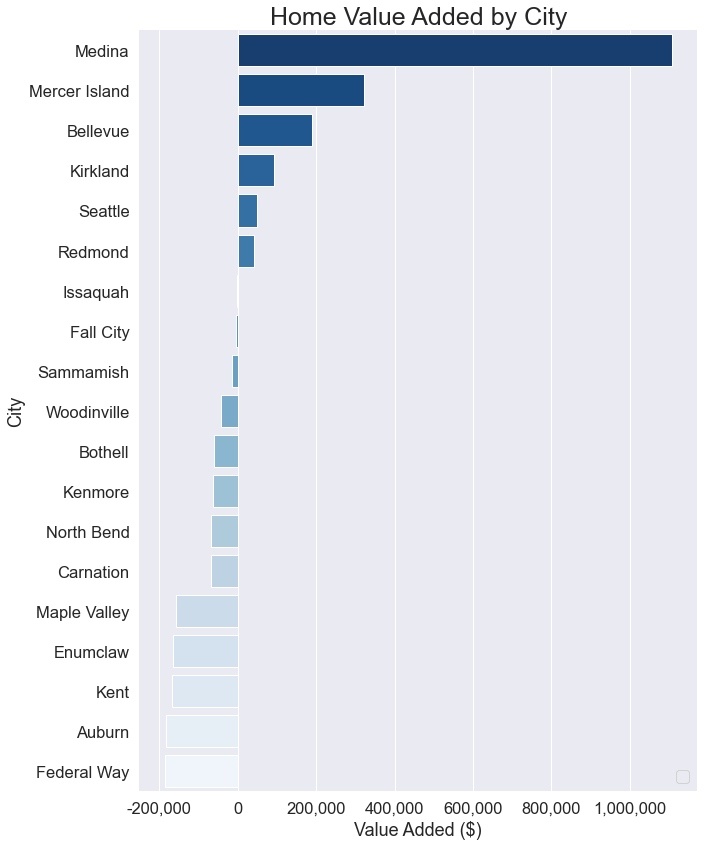

In [128]:

sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 14))


#plot
sns.barplot(x="Value_added", y="index", data=co_df,
             palette = 'Blues_r')


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="City", xlabel="Value Added ($)")
sns.despine(left=True, bottom=True)
plt.title("Home Value Added by City", size = 25)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


## Checking the Assumptions

### Checking Linearity

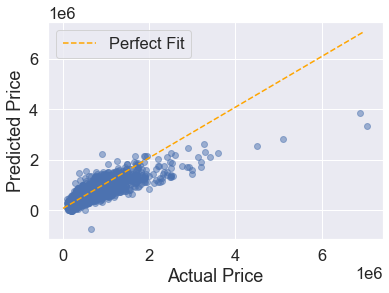

In [96]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

This is fairly linear, although it deviates the higher the home price is.

### Normality

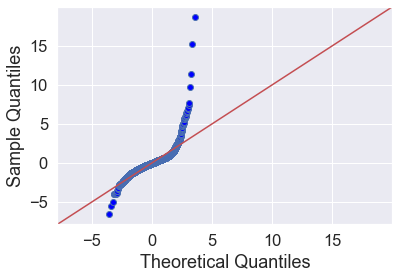

In [97]:
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

It seems we are violating the normality assumption

### Molticollinearity

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bedrooms            1.723126
bathrooms           3.333402
sqft_living       163.407395
floors              2.141428
waterfront          1.197352
view                1.419447
condition           1.243896
grade               1.176520
sqft_above        132.675721
sqft_basement      36.928135
yr_built            2.248970
sqft_living15       2.960348
sqft_lot15          1.287747
Seattle          4176.380117
Kenmore           134.688190
Sammamish         386.799699
Redmond           465.236871
Federal Way       377.284237
Maple Valley      276.812621
Bellevue          650.172609
Duvall             89.275434
Auburn            419.679387
Mercer Island     135.064975
Kent              559.660006
Issaquah          358.628295
Renton            763.174124
Vashon             54.687747
Kirkland          460.889933
Black Diamond      52.445746
North Bend        113.344140
Woodinville       229.612879
Snoqualmie        146.690795
Enumclaw          107.513279
Fall City          41.172587
Bothell       

There are an enormous number of variables which have a score above 5, making them too high in terms of multicollinearity. 

### Homoscedasticity

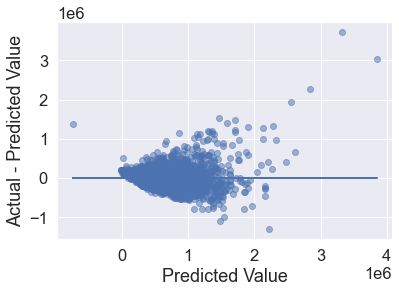

In [99]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Looks pretty good?